In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploaded1 = files.upload()

Saving AMZN.csv to AMZN.csv


In [ ]:
uploaded2 = files.upload()

Saving amzn_testing.csv to amzn_testing.csv


In [ ]:
import io
amazon_testing_complete = pd.read_csv(io.BytesIO(uploaded2['amzn_testing.csv']))

In [ ]:
l=[]
for i in amazon_testing_complete['Open']:
  l.append(i)


In [ ]:
lh=[]
for i in amazon_testing_complete['High']:
  lh.append(i)

In [ ]:
ld=[]
for i in amazon_testing_complete['Date']:
  ld.append(i)

In [ ]:
dftest = pd.DataFrame({'Date':ld, 'Open':l, 'High':lh}, columns = ['Date', 'Open', 'High'])

In [ ]:
dftest

,Date,Open,High
0,2021-08-02,3353.100098,3358.919922
1,2021-08-03,3340.719971,3391.000000
2,2021-08-04,3379.350098,3388.879883
3,2021-08-05,3356.219971,3389.000000
4,2021-08-06,3375.000000,3375.000000
5,2021-08-09,3343.610107,3354.879883
6,2021-08-10,3345.010010,3358.000000
7,2021-08-11,3331.449951,3337.699951
8,2021-08-12,3290.000000,3314.510010
9,2021-08-13,3305.669922,3306.070068


In [ ]:
import io
amazon_training_complete = pd.read_csv(io.BytesIO(uploaded1['AMZN.csv']))

In [ ]:
amazon_training_processed = amazon_training_complete.iloc[:, 1:2].values

In [ ]:
l=[]
for i in amazon_training_complete['Open']:
  l.append(i)
lh=[]
for i in amazon_training_complete['High']:
  lh.append(i)
ld=[]
for i in amazon_training_complete['Date']:
  ld.append(i)

dftrain = pd.DataFrame({'Date':ld, 'Open':l, 'High':lh}, columns = ['Date','Open', 'High'])

In [ ]:
dftrain

,Date,Open,High
0,2018-08-01,1784.000000,1798.439941
1,2018-08-02,1788.770020,1836.560059
2,2018-08-03,1837.739990,1841.000000
3,2018-08-06,1825.810059,1847.770020
4,2018-08-07,1854.530029,1869.719971
...,...,...,...
749,2021-07-23,3640.000000,3666.110107
750,2021-07-26,3673.169922,3712.080078
751,2021-07-27,3698.500000,3698.500000
752,2021-07-28,3633.780029,3658.419922


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

amazon_training_scaled = scaler.fit_transform(amazon_training_processed)

In [ ]:
features_set = []
labels = []
for i in range(60, 748):
    features_set.append(amazon_training_scaled[i-60:i, 0])
    labels.append(amazon_training_scaled[i, 0])

In [ ]:
features_set, labels = np.array(features_set), np.array(labels)

In [ ]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))


In [ ]:
model.add(Dense(units = 1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(features_set, labels, epochs = 100,  batch_size = 32   )

Epoch 1/100
22/22 [==============================] - 11s 149ms/step - loss: 0.0598
Epoch 2/100
22/22 [==============================] - 3s 154ms/step - loss: 0.0098
Epoch 3/100
22/22 [==============================] - 3s 148ms/step - loss: 0.0074
Epoch 4/100
22/22 [==============================] - 3s 151ms/step - loss: 0.0071
Epoch 5/100
22/22 [==============================] - 3s 151ms/step - loss: 0.0063
Epoch 6/100
22/22 [==============================] - 3s 148ms/step - loss: 0.0059
Epoch 7/100
22/22 [==============================] - 3s 150ms/step - loss: 0.0069
Epoch 8/100
22/22 [==============================] - 3s 155ms/step - loss: 0.0058
Epoch 9/100
22/22 [==============================] - 3s 151ms/step - loss: 0.0062
Epoch 10/100
22/22 [==============================] - 3s 154ms/step - loss: 0.0070
Epoch 11/100
22/22 [==============================] - 3s 153ms/step - loss: 0.0064
Epoch 12/100
22/22 [==============================] - 3s 154ms/step - loss: 0.0062
Epoch 13/100

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            2

In [ ]:
amazon_testing_processed = amazon_testing_complete.iloc[:, 1:2].values

In [ ]:
amazon_total = pd.concat((amazon_training_complete['Open'], amazon_testing_complete['Open']), axis=0)

In [ ]:
test_inputs = amazon_total[len(amazon_total) - len(amazon_testing_complete) - 60:].values

In [ ]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [ ]:
test_features = []
for i in range(60, 80): test_features.append(test_inputs[i-60:i, 0])

In [ ]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [ ]:
predictions = model.predict(test_features)

In [ ]:
predictions = scaler.inverse_transform(predictions)

In [ ]:
len(test_inputs )

80

In [ ]:
len(features_set)

688

In [ ]:
len(labels)

688

In [ ]:
len(predictions)

20

In [ ]:
len(test_features)

20

In [ ]:
acc = model.evaluate(features_set, labels, batch_size=32, verbose=2)

print("acc: %.2f" % (acc))

22/22 - 2s - loss: 0.0011
acc: 0.00


In [ ]:
acc = model.evaluate(features_set, labels, batch_size=32, verbose=2)

print("acc: %.2f" % (acc))

22/22 - 1s - loss: 0.0011
acc: 0.00


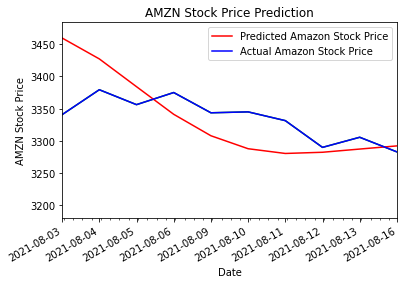

In [ ]:
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import numpy as np

dates=amazon_testing_complete['Date']
y=amazon_testing_processed
fig, ax = plt.subplots()
ax.plot_date(dates, y , 'g')
ax.set_xlim(dates[1], dates[10])

ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_minor_locator(HourLocator(range(1, 26, 6)))
#ax.xaxis.set_major_formatter(DateFormatter('% Y-% m-% d'))

ax.fmt_xdata = DateFormatter('% Y-% m-% d H:% M:% S')
fig.autofmt_xdate()
plt.plot(predictions , color='red', label='Predicted Amazon Stock Price')
plt.plot(amazon_testing_processed, color='blue', label='Actual Amazon Stock Price')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('AMZN Stock Price')
plt.legend()
plt.show()

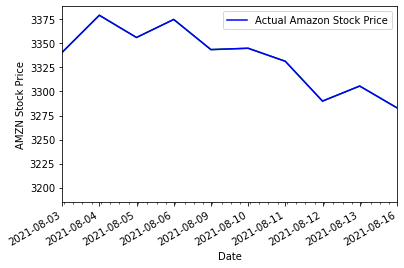

In [ ]:
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import numpy as np

dates=amazon_testing_complete['Date']
y=amazon_testing_processed
fig, ax = plt.subplots()
ax.plot_date(dates, y , 'g')
ax.set_xlim(dates[1], dates[10])

ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_minor_locator(HourLocator(range(1, 26, 6)))
#ax.xaxis.set_major_formatter(DateFormatter('% Y-% m-% d'))

ax.fmt_xdata = DateFormatter('% Y-% m-% d H:% M:% S')
fig.autofmt_xdate()
plt.plot(amazon_testing_processed, color='blue', label='Actual Amazon Stock Price')
plt.xlabel('Date')
plt.ylabel('AMZN Stock Price')
plt.legend()
plt.show()

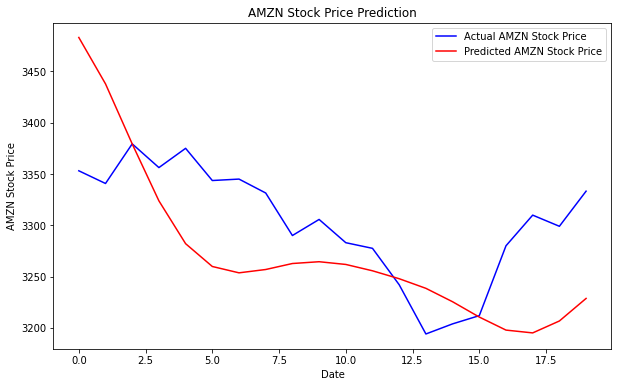

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual AMZN Stock Price')
plt.plot(predictions , color='red', label='Predicted AMZN Stock Price')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('AMZN Stock Price')
plt.legend()
plt.show()